<a href="https://colab.research.google.com/github/daawonn/dl_study_1/blob/master/image_classification_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras Image Classification Example 

### data preprocessing

- tensorflow : 딥러닝 라이브러리
- numpy : 배열 계산
- pandas : 데이터프레임
- matplotlib : 시각화 라이브러리

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- mnist 데이터 셋 가져오기

In [3]:
mnist = keras.datasets.fashion_mnist
type(mnist)

module

- 데이터셋을 학습데이터와 테스트데이터로 분할

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

- 클래스 이름 설정

In [0]:
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sendal', 'shirt', 'sneaker', 'bag', 'ankle boot']

- 데이터 시각화


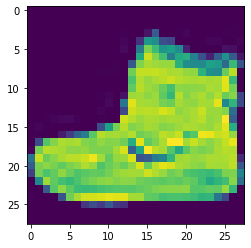

In [6]:
plt.figure()
plt.imshow(X_train[0])

- 데이터 스케일 축소
0 ~ 255 의 데이터를 0과 1 사이로 표준화

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

### build the model with TF2.0

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

- 모델은 Sequential 타입
- 객체에 신경망 구조 구축
  - 입력계층에서 Flatten
  - Dense 로 이동
  - 마지막 Dense가 출력층이 된다
  - activation : 활성화 함수 

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

- summary를 이용하여 대략적인 모델의 내부 구조 파악
  - Flatten 28*28 = 784의 노드가 한꺼번에 계산
  - params : weight 가중치

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 28)                21980     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


### model compilation

- optimizer : 손실함수
- loss : 손실값 계산 방법
- metrics : 학습 진행 중 내부 정보 여기선, 정확도

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

- 모델 학습 model.fit() 이용

In [12]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5494 - accuracy: 0.8113
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4173 - accuracy: 0.8545
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3826 - accuracy: 0.8645
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3603 - accuracy: 0.8713
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3440 - accuracy: 0.8763
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3309 - accuracy: 0.8811
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8853
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8872
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.8888
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.297

- 테스트
  - 학습시킨 모델의 성과를 확인
  - evaluate : 구축한 신경망의 현재 성능 파악가능

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8665
0.39036932587623596
0.8665000200271606


- 실제 사용

In [14]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8665